In [22]:
import numpy as np
import pandas as pd


from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [23]:
data = pd.read_csv('/content/milknew.csv')
data

,pH,Temprature,Taste,Odor,Fat_Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
1054,6.7,45,1,1,0,0,247,medium
1055,6.7,38,1,0,1,0,255,high
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high


### **1. Data Understanding**

In [24]:
# Menampilkan statistik deskriptif
print(data.describe())

                pH   Temprature        Taste         Odor    Fat_Lemak  \
count  1059.000000  1059.000000  1059.000000  1059.000000  1059.000000   
mean      6.630123    44.226629     0.546742     0.432483     0.671388   
std       1.399679    10.098364     0.498046     0.495655     0.469930   
min       3.000000    34.000000     0.000000     0.000000     0.000000   
25%       6.500000    38.000000     0.000000     0.000000     0.000000   
50%       6.700000    41.000000     1.000000     0.000000     1.000000   
75%       6.800000    45.000000     1.000000     1.000000     1.000000   
max       9.500000    90.000000     1.000000     1.000000     1.000000   

         Turbidity       Colour  
count  1059.000000  1059.000000  
mean      0.491029   251.840415  
std       0.500156     4.307424  
min       0.000000   240.000000  
25%       0.000000   250.000000  
50%       0.000000   255.000000  
75%       1.000000   255.000000  
max       1.000000   255.000000  


In [25]:
# Menampilkan informasi tipe data dan jumlah nilai non-null
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat_Lemak   1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB
None


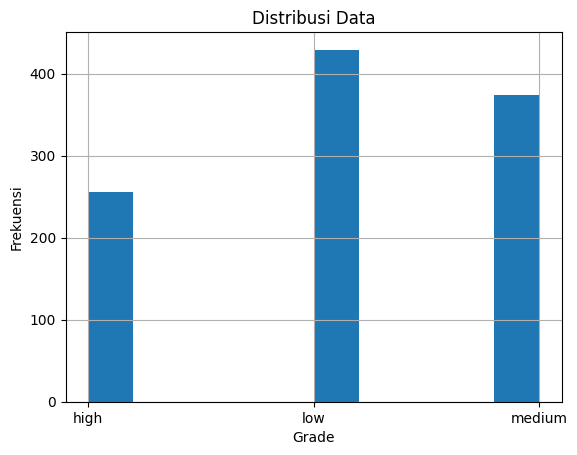

In [26]:
import matplotlib.pyplot as plt

# Menampilkan histogram untuk satu kolom
data['Grade'].hist()
plt.title('Distribusi Data')
plt.xlabel('Grade')
plt.ylabel('Frekuensi')
plt.show()

In [27]:
# Menampilkan jumlah nilai yang hilang per kolom
print(data.isnull().sum())

pH            0
Temprature    0
Taste         0
Odor          0
Fat_Lemak     0
Turbidity     0
Colour        0
Grade         0
dtype: int64


In [28]:
#Melakukan pengecek an terhadap nilai duplikasi
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1054     True
1055     True
1056     True
1057     True
1058     True
Length: 1059, dtype: bool

In [29]:
data = data.drop_duplicates()

In [30]:
#Melakukan pengecek an terhadap nilai duplikasi
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
930    False
942    False
957    False
985    False
998    False
Length: 83, dtype: bool

In [31]:
data

,pH,Temprature,Taste,Odor,Fat_Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


### **2. Data Preparation**

KETERANGAN :
1. Ph susu :PH susu yang berkisar antara 3 hingga 9,5 maks : 6,25 hingga 6,90
2. Suhu : Suhu susu yang berkisar antara 34'C hingga 90'C maks : 34'C hingga 45.20'C
3. Taste : Rasa susu yang merupakan data kategori 0 (Buruk) atau 1 (Baik)
4. Bau : Bau susu yang merupakan data kategori 0 (Buruk) atau 1 (Baik)
5. Lemak : kategori 0 (Rendah) atau 1 (Tinggi) maks
6. Kekeruhan : kategori 0 (Rendah) atau 1 (Tinggi)
7. Warna : Warna susu yang berkisar antara 240 hingga 255 maks : 255
8. Grade : Nilai (Target) susu yang merupakan data kategoris Dimana Rendah (Buruk) atau Sedang (Sedang) Tinggi

In [32]:
data

,pH,Temprature,Taste,Odor,Fat_Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low
4,6.6,37,0,0,0,0,255,medium
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,high
942,6.6,45,1,0,0,1,255,medium
957,6.8,41,1,1,1,0,255,high
985,6.5,45,1,0,0,0,246,medium


In [33]:
#Melakukan penggantian string ke integer
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Grade'] = label_encoder.fit_transform(data['Grade'])

<ipython-input-33-6679e5f7217e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grade'] = label_encoder.fit_transform(data['Grade'])


In [36]:
data

,pH,Temprature,Taste,Odor,Fat_Lemak,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,0
1,6.6,36,0,1,0,1,253,0
2,8.5,70,1,1,1,1,246,1
3,9.5,34,1,1,0,1,255,1
4,6.6,37,0,0,0,0,255,2
...,...,...,...,...,...,...,...,...
930,6.6,38,0,1,1,1,255,0
942,6.6,45,1,0,0,1,255,2
957,6.8,41,1,1,1,0,255,0
985,6.5,45,1,0,0,0,246,2


In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          83 non-null     float64
 1   Temprature  83 non-null     int64  
 2   Taste       83 non-null     int64  
 3   Odor        83 non-null     int64  
 4   Fat_Lemak   83 non-null     int64  
 5   Turbidity   83 non-null     int64  
 6   Colour      83 non-null     int64  
 7   Grade       83 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


In [35]:
#Melihat rata-rata nilai dataset
data.describe()

,pH,Temprature,Taste,Odor,Fat_Lemak,Turbidity,Colour,Grade
count,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,6.668675,43.698795,0.493976,0.397590,0.602410,0.433735,251.313253,1.132530
std,0.986856,9.379187,0.503003,0.492375,0.492375,0.498602,4.577058,0.823009
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000,0.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,247.000000,0.000000
50%,6.600000,41.000000,0.000000,0.000000,1.000000,0.000000,255.000000,1.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000,2.000000


In [37]:
x = data.drop(columns=['Grade'])
y = data['Grade']

print ("X : ", x.shape)
print ("y : ", y.shape)

X :  (83, 7)
y :  (83,)


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=42)
print(f'x_train : {x_train.shape}')
print(f'y_train : {y_train.shape}')
print(f'x_test : {x_test.shape}')
print(f'y_test : {y_test.shape}')

x_train : (66, 7)
y_train : (66,)
x_test : (17, 7)
y_test : (17,)


In [39]:
y_train

547    2
82     2
41     1
9      2
107    1
      ..
20     0
105    0
576    0
14     0
65     2
Name: Grade, Length: 66, dtype: int64

In [40]:
x_train

,pH,Temprature,Taste,Odor,Fat_Lemak,Turbidity,Colour
547,6.5,40,1,0,0,0,250
82,6.8,45,0,1,0,0,240
41,3.0,40,1,0,0,0,255
9,6.7,45,1,1,0,0,247
107,6.8,50,0,0,1,0,255
...,...,...,...,...,...,...,...
20,6.6,45,0,1,1,1,250
105,6.6,35,0,1,1,1,255
576,6.6,40,1,0,1,1,255
14,6.8,45,0,1,1,1,255


### **3. Modelling**

In [41]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [42]:
y_pred = classifier.predict(x_test)
y_pred

array([2, 0, 1, 2, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 2, 2, 0])

In [43]:
from sklearn.metrics import confusion_matrix
matrik = confusion_matrix(y_test, y_pred)

In [44]:
matrik

array([[2, 0, 0],
       [0, 5, 2],
       [2, 0, 6]])

In [45]:
#MElakukan proses evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

In [46]:
# Tampilkan hasil evaluasi
print('Akurasi Naive Bayes: {:.2f}%'.format(accuracy*100))
print('Precision: {:.2f}%'.format(precision*100))
print('Recall: {:.2f}%'.format(recall*100))
print('F1 Score: {:.2f}%'.format(f1*100))
print('\nClassification Report:\n', classification_report(y_test, y_pred))
print('\nConfusion Matrix:\n', conf_matrix)

Akurasi Naive Bayes: 76.47%
Precision: 82.35%
Recall: 76.47%
F1 Score: 77.45%

Classification Report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      0.71      0.83         7
           2       0.75      0.75      0.75         8

    accuracy                           0.76        17
   macro avg       0.75      0.82      0.75        17
weighted avg       0.82      0.76      0.77        17


Confusion Matrix:
 [[2 0 0]
 [0 5 2]
 [2 0 6]]


In [47]:
#Melakukan proses inputan data
testing = {'pH': [8.5],
           'Temprature': [70],
           'Taste': [1],
           'Odor': [1],
           'Fat_Lemak': [1],
           'Turbidity': [1],
           'Colour': [246]}

testing = pd.DataFrame(testing)
testing

,pH,Temprature,Taste,Odor,Fat_Lemak,Turbidity,Colour
0,8.5,70,1,1,1,1,246


In [48]:
#Memprediksi hasil inputan Data
pred_testing=classifier.predict(testing)
print('Hasil Testing Data Baru :')
print(pred_testing)

Hasil Testing Data Baru :
[1]


SIMPAN HASIL PREDIKSI

In [49]:
import pickle

In [50]:
filename = 'Susu_model.sav'
pickle.dump(classifier, open(filename,'wb'))

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83 entries, 0 to 998
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          83 non-null     float64
 1   Temprature  83 non-null     int64  
 2   Taste       83 non-null     int64  
 3   Odor        83 non-null     int64  
 4   Fat_Lemak   83 non-null     int64  
 5   Turbidity   83 non-null     int64  
 6   Colour      83 non-null     int64  
 7   Grade       83 non-null     int64  
dtypes: float64(1), int64(7)
memory usage: 5.8 KB


In [ ]:
print(data.dtypes)

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat_Lemak       int64
Turbidity       int64
Colour          int64
Grade           int64
dtype: object


In [ ]:
data['pH'] = pd.to_numeric(data['pH'], errors='coerce')

In [ ]:
print(data.dtypes)

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat_Lemak       int64
Turbidity       int64
Colour          int64
Grade           int64
dtype: object


In [ ]:
for column in data.columns:
    unique_values = data[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in pH: [6.6 8.5 9.5 5.5 4.5 8.1 6.7 5.6 8.6 7.4 6.8 6.5 4.7 3.  9.  6.4]
Unique values in Temprature: [35 36 70 34 37 45 60 66 50 55 90 38 40 43 42 41 65]
Unique values in Taste: [1 0]
Unique values in Odor: [0 1]
Unique values in Fat_Lemak: [1 0]
Unique values in Turbidity: [0 1]
Unique values in Colour: [254 253 246 255 250 247 245 240 248]
Unique values in Grade: [0 1 2]


In [ ]:
# Periksa tipe data aktual pada kolom 'Colour'
print(data['Colour'].dtype)

# Identifikasi nilai-nilai yang tidak sesuai
non_numeric_values = data[~data['Colour'].astype(str).str.isnumeric()]['Colour']
print(f"Non-numeric values in 'Colour': {non_numeric_values.unique()}")

int64
Non-numeric values in 'Colour': []


In [ ]:
unique_values_colour = data['Colour'].unique()
print(f"Unique values in 'Colour': {unique_values_colour}")

Unique values in 'Colour': [254 253 246 255 250 247 245 240 248]


In [ ]:
print(data.dtypes)

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat_Lemak       int64
Turbidity       int64
Colour          int64
Grade           int64
dtype: object
